In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse
#from scipy.sparse.linalg import eigsh, expm_multiply, expm

In [4]:
import importlib

import sys
sys.path.append('/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/Chebyshev')
sys.path.append('/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/TCI')
sys.path.append("/home/t30/all/go56vod/Desktop/Student-Research-Job/Chebyshev")
sys.path.append("/home/t30/all/go56vod/Desktop/Student-Research-Job/TCI")


import ED_Cs_Lsites as ED
import TCI_Lsite_accumulative_v1 as TCI

importlib.reload(ED)
importlib.reload(TCI)


<module 'TCI_Lsite_accumulative_v1' from '/home/t30/all/go56vod/Desktop/Student-Research-Job/TCI/TCI_Lsite_accumulative_v1.py'>

In [26]:
# define Hamiltonian terms
L = 11
n = 11
dt = 1e-2
models = ['J = 1, g = 2 , Ising Model Ham. = H','J =1 g = 2 Ham. = H - k*Hzz', 'J = 1 g = 0.5, Ham. = H - h * Hxx', 'J = 1 g = 0.5, Ham. = H - k*Hzz - h*Hxx']
threshold = 30
N = 2**n
D = L
g_par = 0.1


In [27]:
# Generate Hamiltonian
Hlist = [ED.gen_Ham(L = L, model = 0), ED.gen_Ham(L = L, model = 2)]

In [28]:
Cs_theo = ED.correlator(H= Hlist[0], L = L, dt = dt,  n = n)
print(Cs_theo.shape)

for i in range(Cs_theo.shape[0]):
    for k in range(Cs_theo.shape[1]):
        if Cs_theo.real[i,k] > 1:
            print('i,k: (', i, ',', k, '), ', Cs_theo[i,k])
            Cs_theo[i,k] = 1. + 1j* Cs_theo.imag[i,k]
        if Cs_theo.imag[i,k] > 1:
            print('i,k: (', i, ',', k, '), ', Cs_theo[i,k])
            Cs_theo[i,k] = Cs_theo.real[i,k] + 1j

Expectation value $\bra{\psi_0} X_{L/2} \ket{psi_0}$=  1.3927141212996165e-15
(11, 2048)
i,k: ( 5 , 0 ),  (1.0000000000000024+0j)


In [40]:
N_shots = 2**13 #8192 rough estimation by Bernhard
std_real = np.sqrt(1-Cs_theo.real**2)
std_real = std_real/np.sqrt(N_shots)
std_imag = np.sqrt(1-Cs_theo.imag**2)
std_imag = std_imag/np.sqrt(N_shots)
Cs_noise_real = np.random.normal(0., std_real) 
print(Cs_noise_real.shape)
Cs_noise_imag = np.random.normal(0., std_imag)
Cs_noise = Cs_theo + Cs_noise_imag + Cs_noise_real
print(Cs_noise.shape)

(11, 2048)
(11, 2048)


In [ ]:
# D = L #already defined above

func_vals_theo = Cs_theo.T #Cs is in the form (X,T)
func_vals_noise = Cs_noise.T

#first we define the function f(t)
# which returns the slice of func_vals along x for a specific time 
f_t_theo = lambda *t: Cs_theo.reshape((D,) + (2,) * n)[:,*t]
f_t_noise = lambda *t: Cs_noise.reshape((D,) + (2,) * n)[:,*t]

Comparison between TCI of theoretical and noisy correlation function!

In [42]:
#here we have to define func as the initialization of the class
func_theo = TCI.function(f_t_theo)

As, _, eval, err_2, err_max, func_interp_theo = TCI.accumulative_tensor_cross_interpolation(func_theo,         # function to be interpolated
                                   func_vals_theo,    
                                   D,
                                   L=n,          # number of MPS tensors
                                   iters=5)       # number of back-and-forth sweeps


print()

func_noise = TCI.function(f_t_noise)

As, _, eval, err_2, err_max, func_interp_noise = TCI.accumulative_tensor_cross_interpolation(func_noise,         # function to be interpolated
                                   func_vals_noise,    
                                   D,
                                   L=n,          # number of MPS tensors
                                   iters=5)      # number of back-and-forth sweeps   


err_max:  0.00126614663268558
err_2:  0.0007516265896908592

repeated evaluations:  4108
unique evaluations 408
unique + repeated:  4516
total evaluations:  4516


err_max:  0.07745689280732031
err_2:  0.07534953436432926

repeated evaluations:  4108
unique evaluations 408
unique + repeated:  4516
total evaluations:  4516



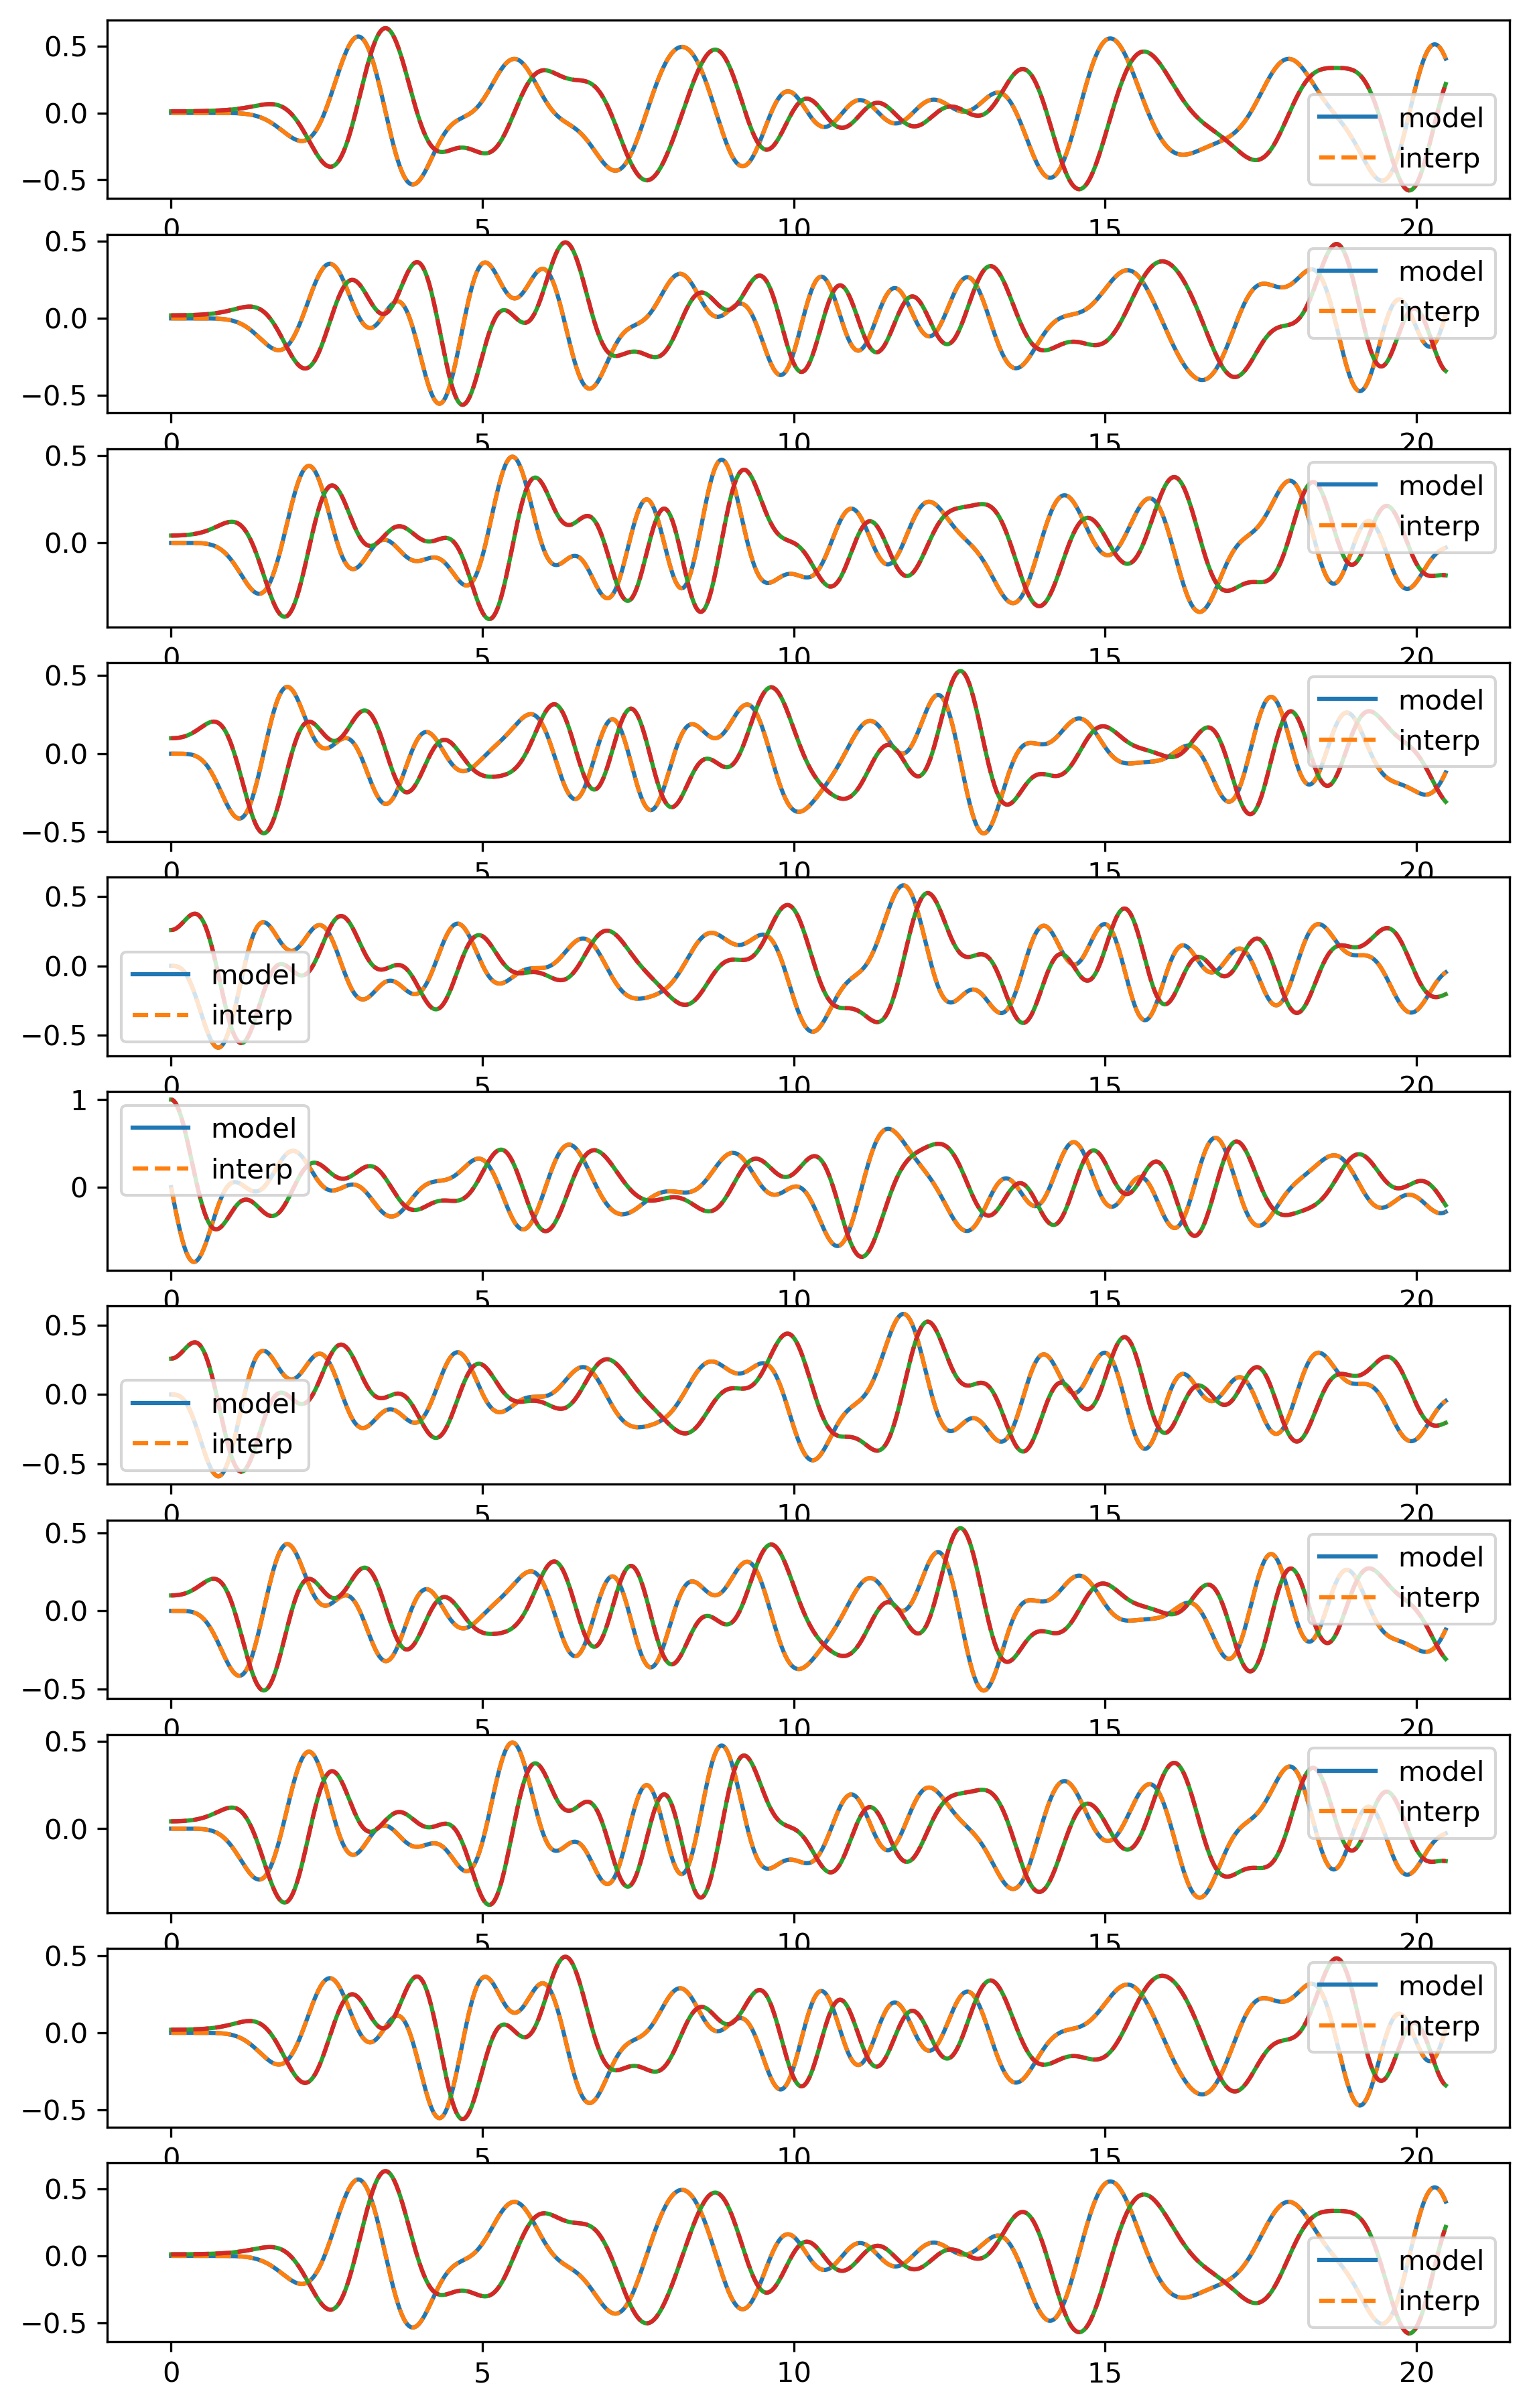

In [43]:
ts = np.arange(N)*dt
D_list = np.arange(D)

fig, axs = plt.subplots(nrows=D, figsize=(9,15), dpi=300)


for i,item in enumerate(D_list):
    axs[i].plot(ts, np.imag(func_vals_theo[:,item]), '-', label = 'model')
    axs[i].plot(ts, np.imag(func_interp_theo[:,item]), '--', label = 'interp')
    axs[i].plot(ts, np.real(func_vals_theo[:,item]), '-')
    axs[i].plot(ts, np.real(func_interp_theo[:,item]), '--')   
    axs[i].legend()

plt.show()  

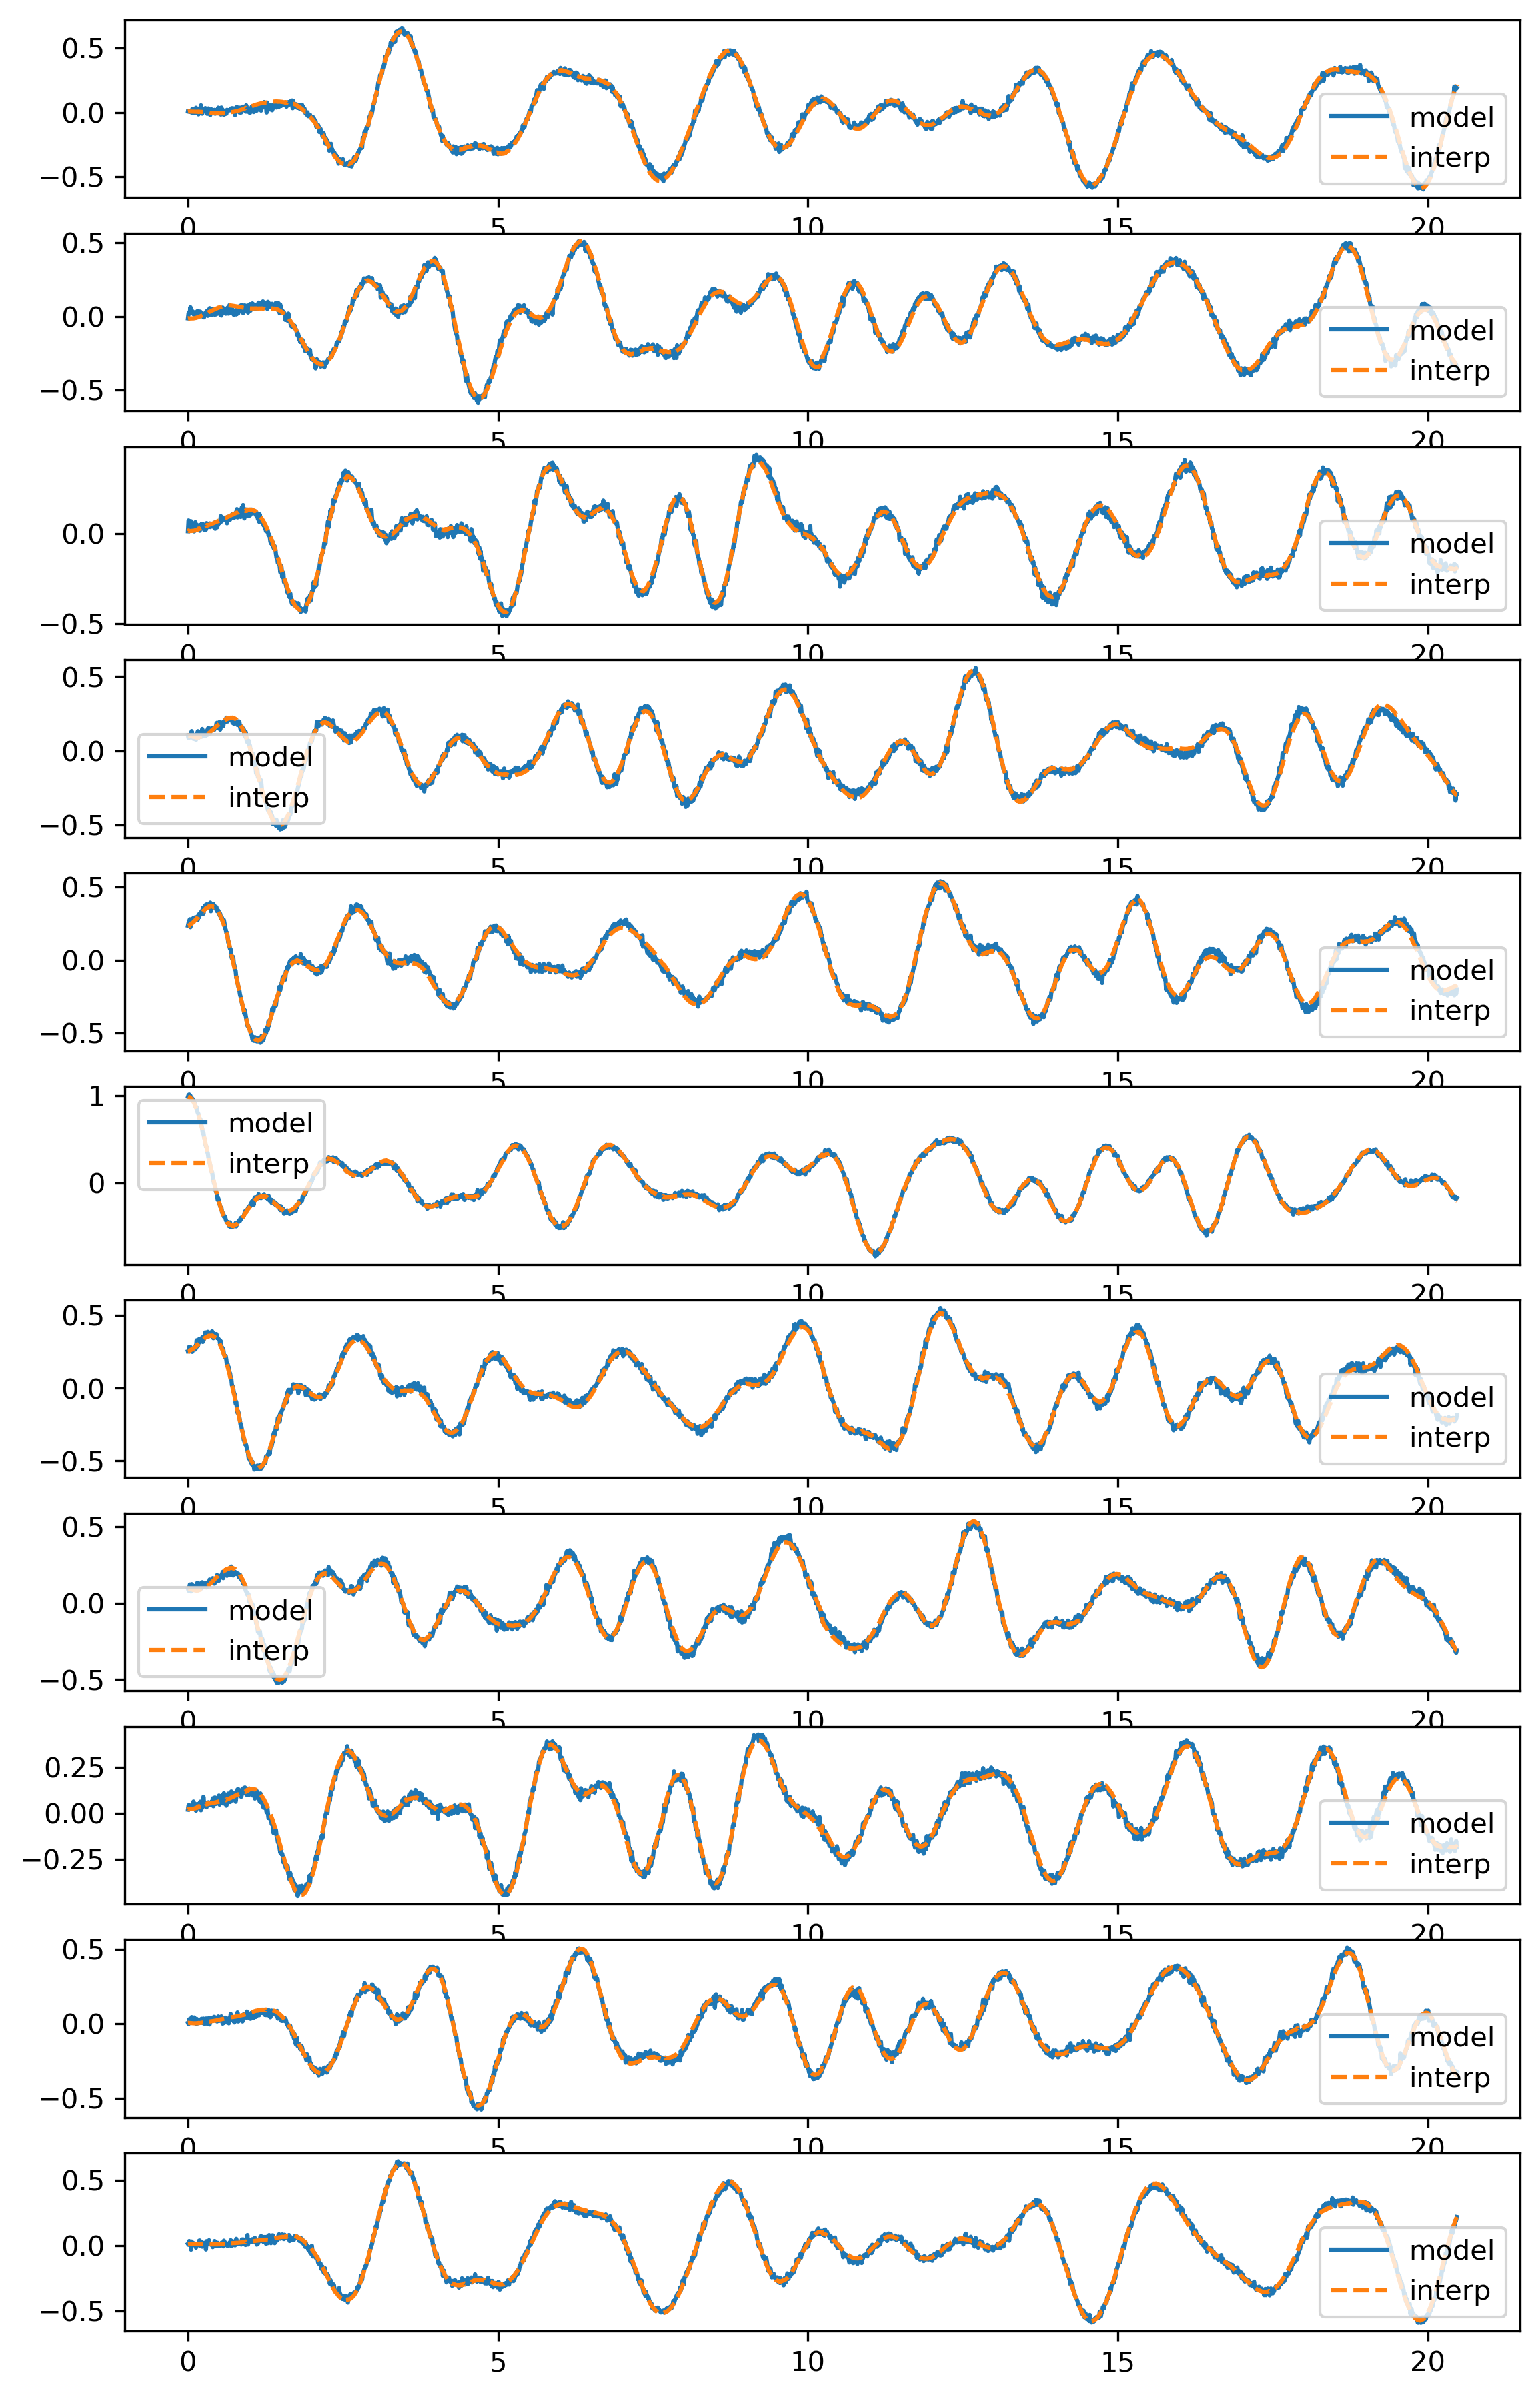

In [44]:
fig, axs = plt.subplots(nrows=D, figsize=(9,15), dpi=300)


for i,item in enumerate(D_list):
    # axs[i].plot(ts, np.imag(func_vals_noise[:,item]), '-', label = 'model')
    # axs[i].plot(ts, np.imag(func_interp_noise[:,item]), '--', label = 'interp')
    axs[i].plot(ts, np.real(func_vals_noise[:,item]), '-', label = 'model')
    axs[i].plot(ts, np.real(func_interp_noise[:,item]), '--', label = 'interp')
    axs[i].legend()

plt.show()  